In [1]:
import h5py
import numpy as np

In [3]:
# Open the HDF5 file in read mode
file_path = "/pscratch/sd/h/hbassi/2D_diff-react_NA_NA.h5"
with h5py.File(file_path, "r") as h5_file:
    # List all groups and datasets
    def print_structure(name, obj):
        print(f"{name}: {type(obj)}")
    
    print("File structure:")
    h5_file.visititems(print_structure)

    # Access specific datasets (example)
    for key in h5_file.keys():
        print(f"Top-level key: {key}")
        data = h5_file[key]
        if isinstance(data, h5py.Dataset):
            print(f"  Dataset shape: {data.shape}, dtype: {data.dtype}")
        elif isinstance(data, h5py.Group):
            print("  This is a group containing:")
            for sub_key in data.keys():
                print(f"    Sub-key: {sub_key}")

In [4]:
with h5py.File(file_path, "r") as h5_file:
    # Explore a single group
    group = h5_file["0000"]
    print("Keys in group 0000:", list(group.keys()))
    
    # Inspect the data array
    data = group["data"][:]
    print("Data shape:", data.shape)
    print("Data sample:", data[0])  # First entry

    # Inspect the grid
    grid_t = group["grid/t"][:]
    grid_x = group["grid/x"][:]
    grid_y = group["grid/y"][:]
    print("Time grid:", grid_t)
    print("X grid:", grid_x)
    print("Y grid:", grid_y)


Keys in group 0000: ['data', 'grid']
Data shape: (101, 128, 128, 2)
Data sample: [[[-1.96862471e+00  6.95367813e-01]
  [ 1.04797220e+00  1.27668452e+00]
  [-9.13079202e-01  6.12773478e-01]
  ...
  [ 1.56340480e+00 -1.42141426e+00]
  [-1.67868841e+00  1.05814564e+00]
  [ 7.01041341e-01 -6.35236949e-02]]

 [[-2.10188821e-01 -4.34707165e-01]
  [-2.83397764e-01 -1.71530259e+00]
  [ 5.14004171e-01 -6.42419383e-02]
  ...
  [-8.47210169e-01 -9.32057381e-01]
  [ 8.96167219e-01  6.06534898e-01]
  [-1.22011721e+00 -1.38879955e+00]]

 [[ 2.57235318e-01 -1.26907670e+00]
  [ 1.84314847e-01 -1.04406916e-01]
  [-1.14367807e+00  9.04967606e-01]
  ...
  [-8.06235731e-01 -5.33314645e-01]
  [ 1.37224779e-01 -1.83587015e-01]
  [-1.10728848e+00  4.80752915e-01]]

 ...

 [[ 5.98320365e-01  8.12224984e-01]
  [ 2.43704274e-01 -5.95493913e-01]
  [-6.09214008e-01 -1.55770314e+00]
  ...
  [ 7.26113200e-01 -1.83221960e+00]
  [-4.01004046e-01 -5.11261821e-01]
  [-3.29372585e-01  2.43803293e-01]]

 [[-2.68028289e-0

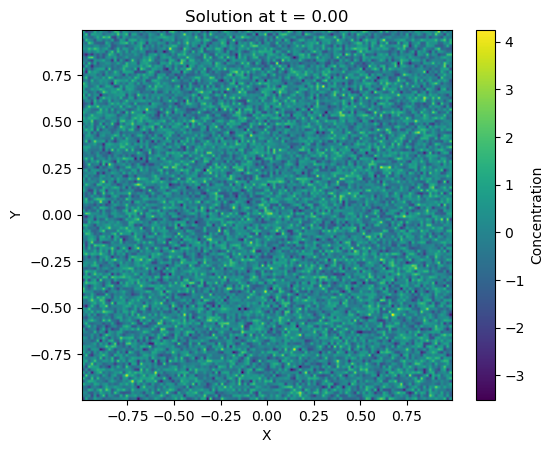

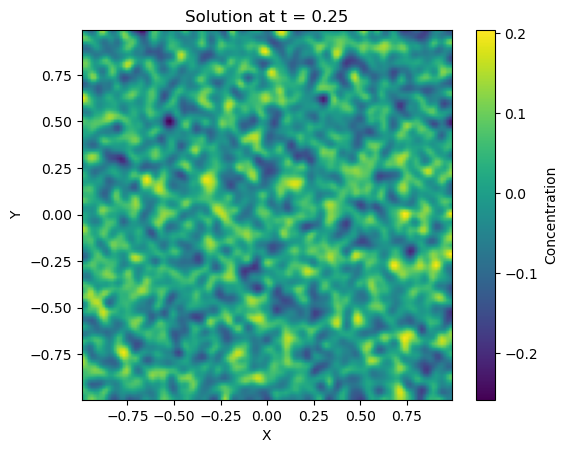

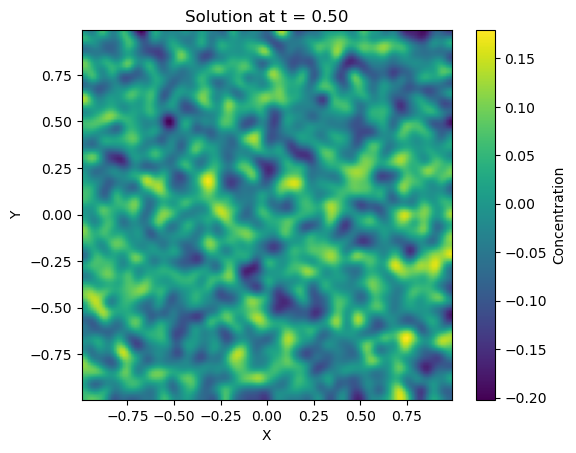

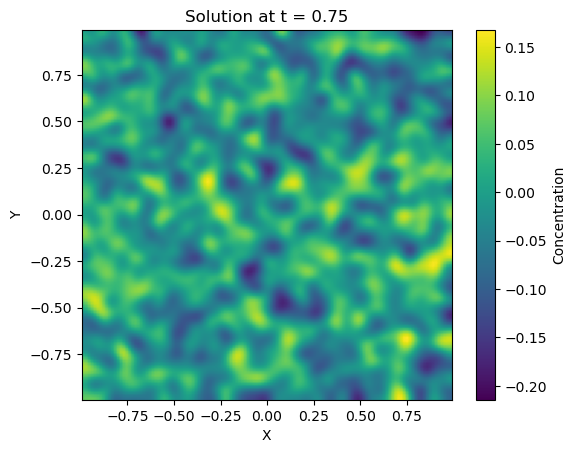

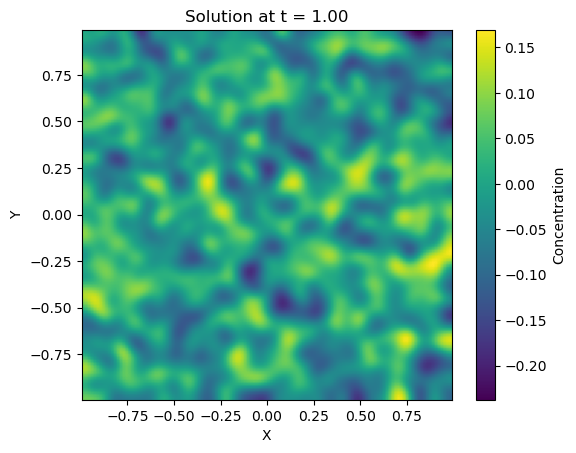

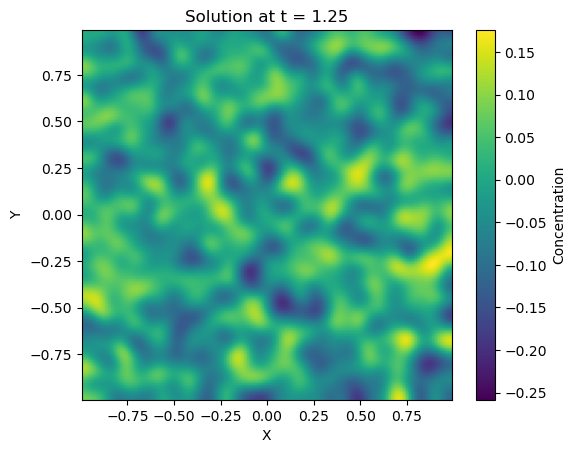

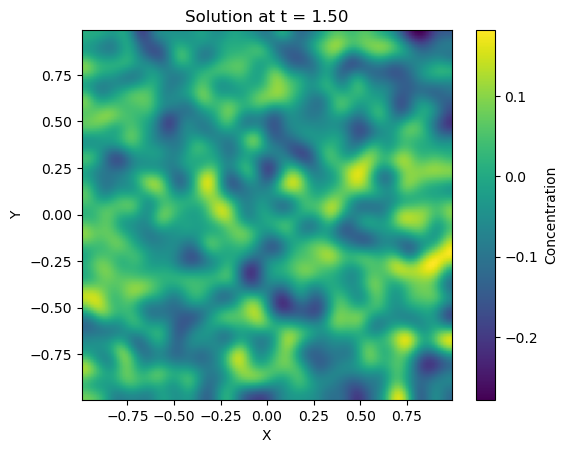

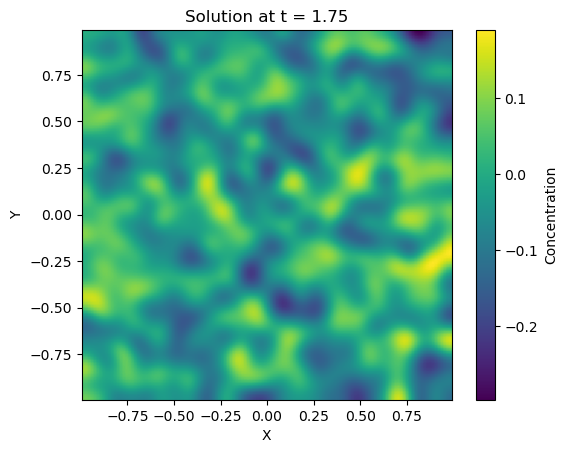

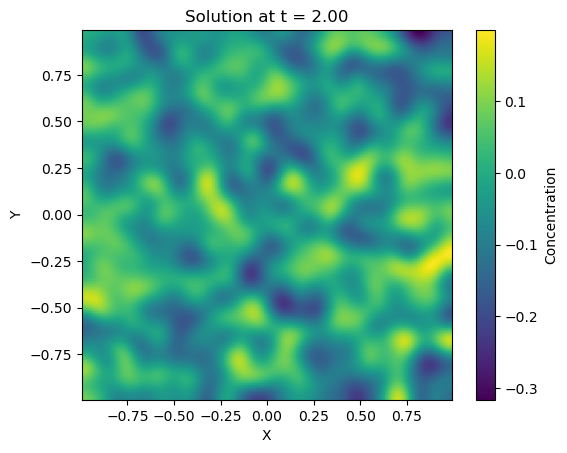

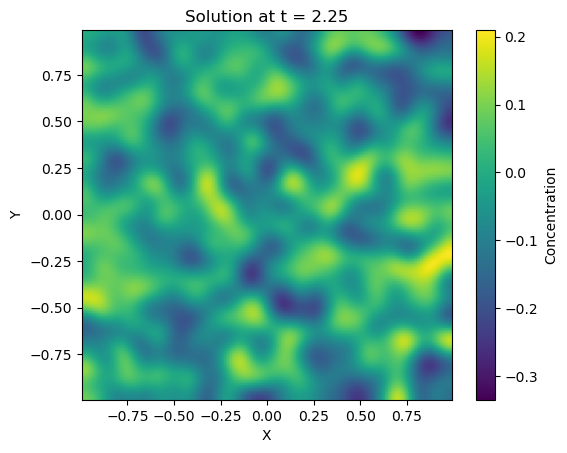

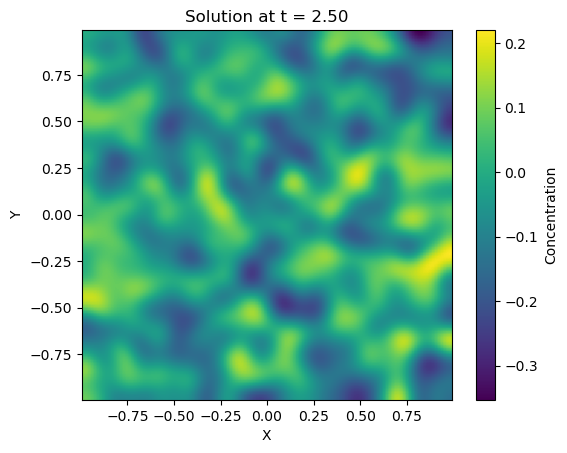

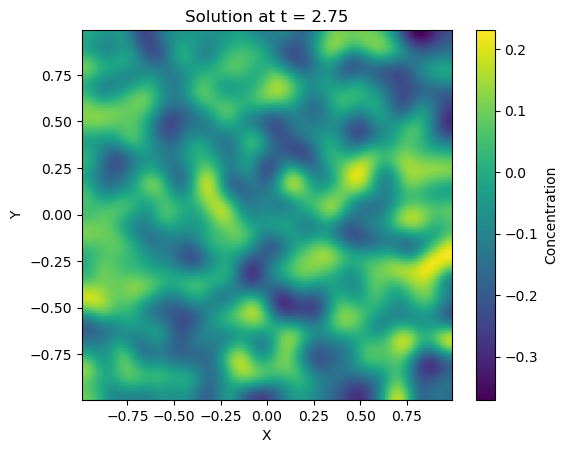

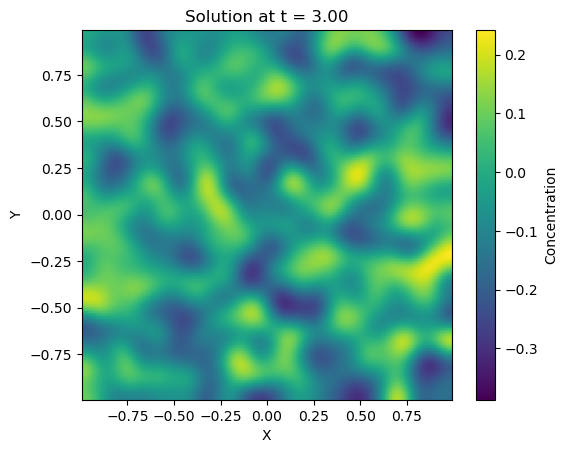

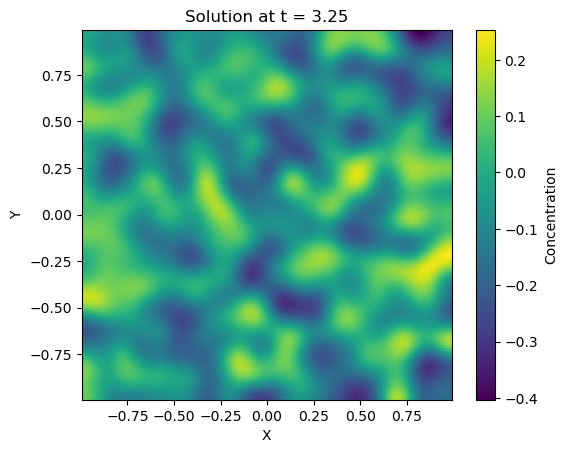

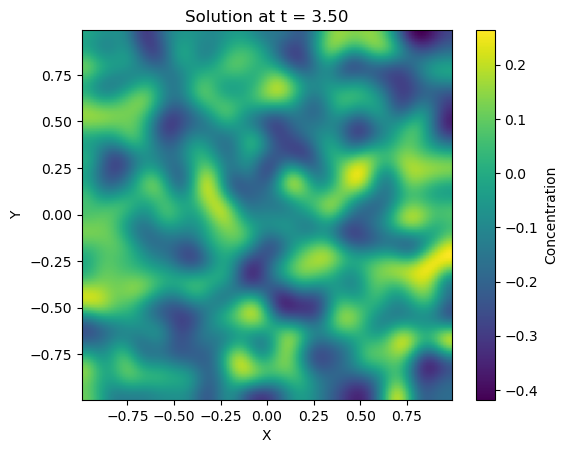

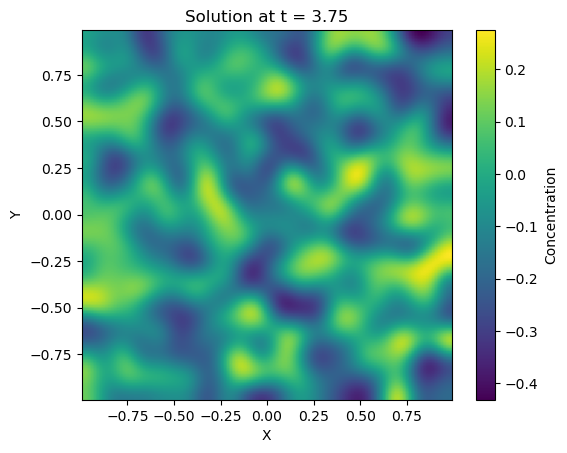

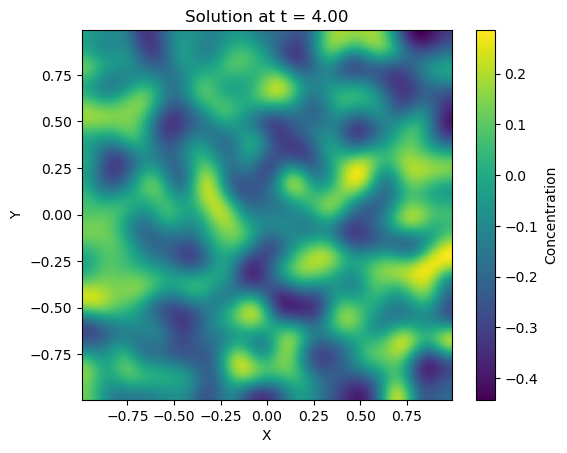

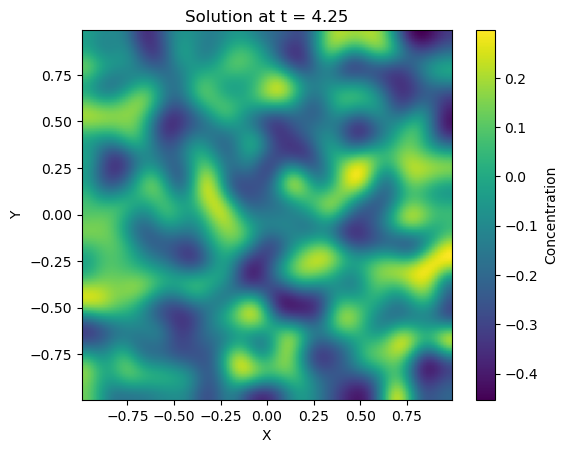

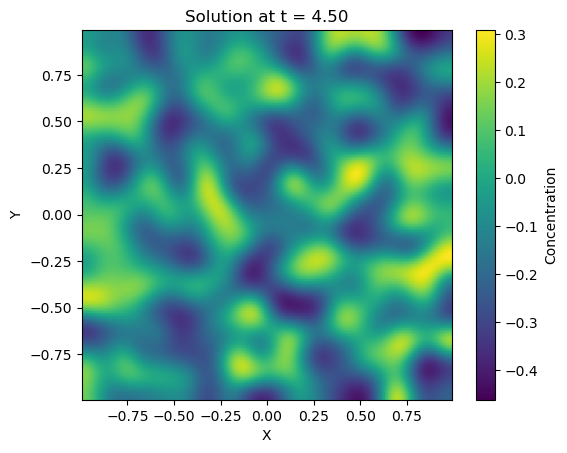

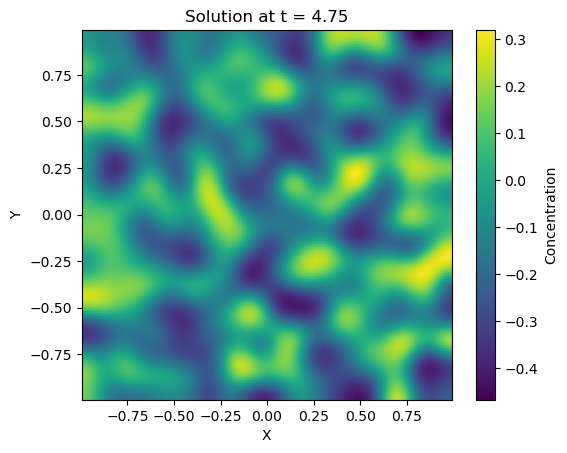

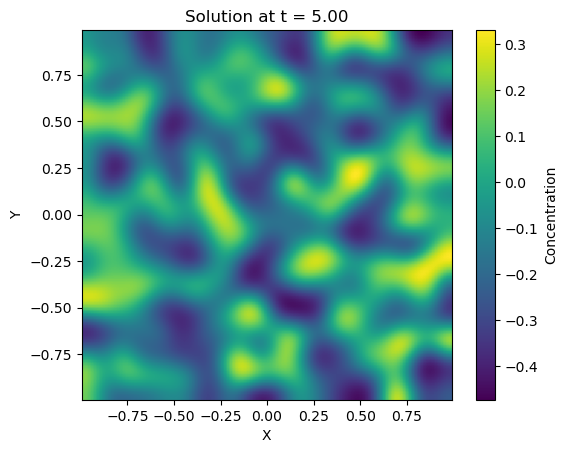

In [11]:
import matplotlib.pyplot as plt

# Assume 'data' has shape (time_steps, grid_x, grid_y)
for i in range(0, 101, 5):
    plt.imshow(data[i, :, :, 0], extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()], origin="lower")
    plt.colorbar(label="Concentration")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Solution at t = {:.2f}".format(grid_t[i]))
    plt.show()


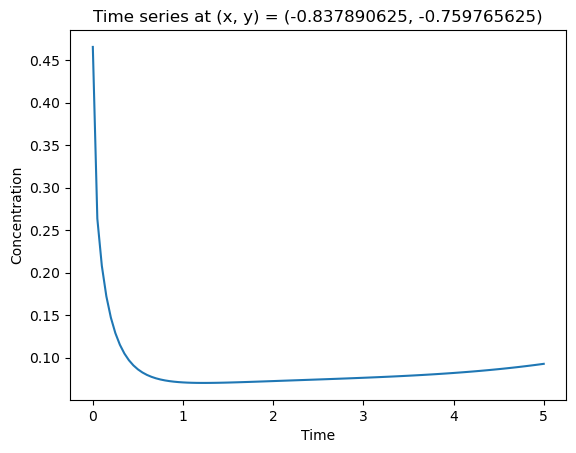

In [9]:
x_idx = 10  # Choose a grid point in x
y_idx = 15  # Choose a grid point in y
time_series = data[:, x_idx, y_idx, 0]
plt.plot(grid_t, time_series)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Time series at (x, y) = ({}, {})".format(grid_x[x_idx], grid_y[y_idx]))
plt.show()
